# Hector Adapter

In [10]:
# Import Packages
import logging
import os.path
import csv

from configparser import ConfigParser
import matplotlib.pyplot as plt
import pandas as pd
import scmdata
import warnings

import openscm_runner
from openscm_runner.run import run
from openscm_runner.adapters import HECTOR
from openscm_runner.adapters import CICEROSCM
from openscm_runner.utils import calculate_quantiles

In [2]:
# Read in Future input emissions
input_emissions = scmdata.ScmRun(
    os.path.join(
        "..", "tests", "test-data", "rcmip_scen_ssp_world_emissions.csv"
    ),
    lowercase_cols=True,
)

input_emissions.head(30)

time                                                                                                    2015-01-01  \
model   region scenario                  unit             variable                                                   
AIM/CGE World  ssp370                    Mt BC/yr         Emissions|BC                                    9.727424   
                                         kt C2F6/yr       Emissions|C2F6                                  1.570000   
                                         kt C6F14/yr      Emissions|C6F14                                 0.350000   
                                         kt CF4/yr        Emissions|CF4                                  10.869900   
                                         Mt CH4/yr        Emissions|CH4                                 388.072796   
                                         Mt CO/yr         Emissions|CO                                  934.349885   
                                         Mt CO2/yr        Emissions|CO2|MAGICC AFOLU                   3517.440000   
                                                          Emissions|CO2|MAGICC Fossil and Industrial  35635.286298   
                                         kt HFC125/yr     Emissions|HFC125                               78.790600   
                                         kt HFC134a/yr    Emissions|HFC134a                             201.953400   
                                         kt HFC143a/yr    Emissions|HFC143a                              32.381000   
                                         kt HFC227ea/yr   Emissions|HFC227ea                              3.663300   
                                         kt HFC23/yr      Emissions|HFC23                                14.485700   
                                         kt HFC245fa/yr   Emissions|HFC245fa                             11.728500   
                                         kt HFC32/yr      Emissions|HFC32                                38.579200   
                                         kt HFC4310mee/yr Emissions|HFC4310mee                            1.151600   
                                         kt N2O/yr        Emissions|N2O                               10900.000000   
                                         Mt NH3/yr        Emissions|NH3                                  65.279703   
                                         Mt NOx/yr        Emissions|NOx                                 155.520450   
                                         Mt OC/yr         Emissions|OC                                   34.746024   
                                         kt SF6/yr        Emissions|SF6                                   8.020000   
                                         Mt SO2/yr        Emissions|Sulfur                              100.771167   
                                         Mt VOC/yr        Emissions|VOC                                 227.244819   
               ssp370-lowNTCF-aerchemmip Mt BC/yr         Emissions|BC                                    9.727424   
                                         kt C2F6/yr       Emissions|C2F6                                  1.570000   
                                         kt C6F14/yr      Emissions|C6F14                                 0.350000   
                                         kt CF4/yr        Emissions|CF4                                  10.869900   
                                         Mt CH4/yr        Emissions|CH4                                 388.072796   
                                         Mt CO/yr         Emissions|CO                                  934.349885   
                                         Mt CO2/yr        Emissions|CO2|MAGICC AFOLU                   3517.440000   

time                                                                                                    2020-01-01  \
model   region scenario                  unit             variable                                       

In [3]:
# Set Hector configs
hector_cfgs = [
    {},
    {
        'beta': 0.60,
        'S': 3.5,
        'diff': 1.2
    },
    {
        'beta': 0.40,
        'S': 3.2,
        'diff': 1.8
    }
]

In [4]:
# Output Variables
output_variables=(
        "Surface Air Temperature Change",
        "Atmospheric Concentrations|CO2",
    )

In [5]:
hector = HECTOR()

In [6]:
hector_runs = hector._run(input_emissions, hector_cfgs, output_variables, None)

Mon Mar 18 17:22:52 2024:NOTICE:printLogHeader: hector version 3.1.1
Mon Mar 18 17:22:52 2024:NOTICE:main: hector wrapper start
Mon Mar 18 17:22:52 2024:NOTICE:main: Reading input file /Users/prim232/gitrepos/my-openscm-runner/src/openscm_runner/adapters/hector_adapter/input/run_dir/IMAGE_World_ssp119_cfg.ini
Mon Mar 18 17:22:52 2024:NOTICE:main: Creating and initializing the core.
Mon Mar 18 17:22:52 2024:DEBUG:registerCapability: trackingDate registered to component core
Mon Mar 18 17:22:52 2024:DEBUG:registerCapability: RF_C2F6 registered to component C2F6_halocarbon
Mon Mar 18 17:22:52 2024:DEBUG:registerCapability: C2F6_concentration registered to component C2F6_halocarbon
Mon Mar 18 17:22:52 2024:DEBUG:registerCapability: C2F6_constrain registered to component C2F6_halocarbon
Mon Mar 18 17:22:52 2024:DEBUG:registerCapability: rho_C2F6 registered to component C2F6_halocarbon
Mon Mar 18 17:22:52 2024:DEBUG:registerCapability: delta_C2F6 registered to component C2F6_halocarbon
Mon M

# Plots

In [7]:
plot_kwargs = dict(
    quantiles_plumes=[((0.05, 0.95), 0.5), ((0.5,), 1.0)],
    quantile_over="run_id",
    hue_var="scenario",
    style_var="model",
    style_label="IAM",
    time_axis="year"
)

Text(0.5, 1.0, 'Hector OpenSCM Adapter Results (Global tas)')

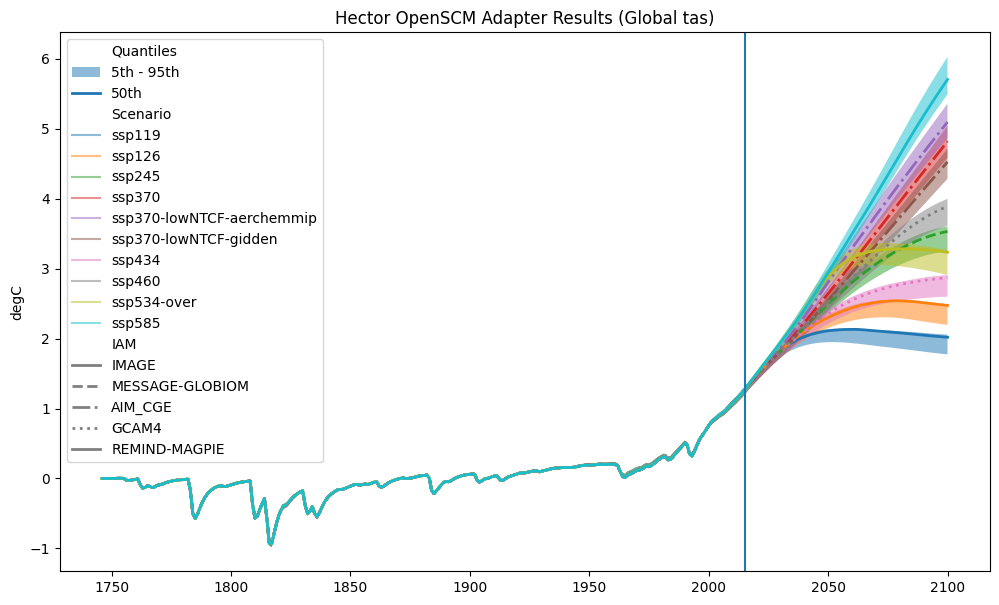

In [8]:
%%capture --no-display
ax = plt.figure(figsize=(12, 7)).add_subplot(111)
hector_runs.filter(variable="global_tas").plumeplot(
    ax=ax, **plot_kwargs
)
ax.axvline(2015)
plt.title('Hector OpenSCM Adapter Results (Global tas)')

# Stats

In [11]:
with warnings.catch_warnings():
    warnings.simplefilter('ignore')
    # tas change ssp126
    max_tas_change_2100_ssp126 = hector_runs.filter(
        variable="global_tas", year=2100, scenario=["ssp126"]
    ).values.max()
    min_tas_change_2100_ssp126 = hector_runs.filter(
        variable="global_tas", year=2100, scenario=["ssp126"]
    ).values.min()
    # 5th and 95th quantile tas change ssp126
    quantiles = calculate_quantiles(hector_runs, [0.05, 0.17, 0.5, 0.83, 0.95])
    q05_tas_change_2100_ssp126 = quantiles.filter(
        variable="global_tas",
        year=2100,
        scenario=["ssp126"],
        quantile=0.05,
    ).values[0][0]
    q95_tas_change_2100_ssp126 = quantiles.filter(
        variable="global_tas",
        year=2100,
        scenario=["ssp126"],
        quantile=0.95,
    ).values[0][0]
    print(f'tas change was between {min_tas_change_2100_ssp126:.2f} and {max_tas_change_2100_ssp126:.2f} by the ' +
    f'year 2100 for ssp126, with the 5th quantile {q05_tas_change_2100_ssp126:.2f} and 95th quantile {q95_tas_change_2100_ssp126:.2f}')

    # tas change ssp370
    max_tas_change_2100_ssp370 = hector_runs.filter(
        variable="global_tas", year=2100, scenario=["ssp370"]
    ).values.max()
    min_tas_change_2100_ssp370 = hector_runs.filter(
        variable="global_tas", year=2100, scenario=["ssp370"]
    ).values.min()
    # 5th and 95th quantile tas change ssp370
    quantiles = calculate_quantiles(hector_runs, [0.05, 0.17, 0.5, 0.83, 0.95])
    q05_tas_change_2100_ssp370 = quantiles.filter(
        variable="global_tas",
        year=2100,
        scenario=["ssp370"],
        quantile=0.05,
    ).values[0][0]
    q95_tas_change_2100_ssp370 = quantiles.filter(
        variable="global_tas",
        year=2100,
        scenario=["ssp370"],
        quantile=0.95,
    ).values[0][0]
    print(f'tas change was between {min_tas_change_2100_ssp370:.2f} and {max_tas_change_2100_ssp370:.2f} by the ' +
    f'year 2100 for ssp370, with the 5th quantile {q05_tas_change_2100_ssp370:.2f} and 95th quantile {q95_tas_change_2100_ssp370:.2f}')

tas change was between 2.16 and 2.49 by the year 2100 for ssp126, with the 5th quantile 2.20 and 95th quantile 2.49
tas change was between 4.56 and 5.07 by the year 2100 for ssp370, with the 5th quantile 4.59 and 95th quantile 5.05


# Breakdown of Hector Run Function
The following will be the implementation of `hector._run()` broken out explicitly. The goal will be for this functionality to be called like
```
hector._run(
    scenarios=input_emissions,
    cfgs=hector_cfgs,
    output_variables=output_variables,
    output_config=None
)
```

In [34]:
cfgs = {
    'beta': 0.60,
    'S': 3.5,
    'diff': 1.2
}
scenarios = input_emissions
runs_input = [
            {"cfgs": cfgs, "output_variables": output_variables, "scenariodata": smdf}
            for (scen, model), smdf in scenarios.timeseries().groupby(["scenario", "model"])
        ]
runs_input[0]

{'cfgs': {'beta': 0.6, 'S': 3.5, 'diff': 1.2},
 'output_variables': ('Surface Air Temperature Change',
  'Atmospheric Concentrations|CO2'),
 'scenariodata': time                                                                                 2015-01-01  \
 model region scenario unit             variable                                                   
 IMAGE World  ssp119   Mt BC/yr         Emissions|BC                                    9.727424   
                       kt C2F6/yr       Emissions|C2F6                                  1.570000   
                       kt C6F14/yr      Emissions|C6F14                                 0.350000   
                       kt CF4/yr        Emissions|CF4                                  10.869900   
                       Mt CH4/yr        Emissions|CH4                                 388.072796   
                       Mt CO/yr         Emissions|CO                                  934.349885   
                       Mt CO2/yr        Emis

Will execute run for each entry in the `runs_input` list (for loop). Here just taking the first entry as example.

In [35]:
current_run = runs_input[0]
current_run_cfgs = current_run['cfgs']
current_run_scenario_data = current_run['scenariodata']
current_run_output_variables = current_run['output_variables']

# Hector Wrapper
Here, we would create a Hector Wrapper Object which allows us to call the Hector executable after generating input files for the given scenario data and configurations.

### Setting paths and file names
TODO: Update Paths

In [36]:
# Current run details
curent_model = current_run_scenario_data.index[0][0]
curent_region = current_run_scenario_data.index[0][1]
curent_scenario = current_run_scenario_data.index[0][2]

# Setting path to directory for scenario specific temp data
run_dir = '../src/openscm_runner/adapters/hector_adapter/input/run_dir'

# Setting path to input data directory
input_dir = '../src/openscm_runner/adapters/hector_adapter/input'

# Current Run Emissions File Name
cur_run_emis_fn = f'{curent_model}_{curent_region}_{curent_scenario}_emis.csv'

# Current Run .ini File Name
cur_run_ini_fn = f'{curent_model}_{curent_region}_{curent_scenario}_cfg.ini'

# Historical Emissions File Name
hist_emis_fn = f'default_emiss-constraints.csv'

# Default .ini File Name
default_ini_fn = f'default_config.ini'

# OpenSCM to Hector Mapping file
openscm_hector_mapping_fn = f'openscm-hector-mapping.csv'


### Create Scenario Specific Emissions File

In [37]:
current_run_scenario_data

time                                                                                 2015-01-01  \
model region scenario unit             variable                                                   
IMAGE World  ssp119   Mt BC/yr         Emissions|BC                                    9.727424   
                      kt C2F6/yr       Emissions|C2F6                                  1.570000   
                      kt C6F14/yr      Emissions|C6F14                                 0.350000   
                      kt CF4/yr        Emissions|CF4                                  10.869900   
                      Mt CH4/yr        Emissions|CH4                                 388.072796   
                      Mt CO/yr         Emissions|CO                                  934.349885   
                      Mt CO2/yr        Emissions|CO2|MAGICC AFOLU                   3517.440000   
                                       Emissions|CO2|MAGICC Fossil and Industrial  35635.286298   
                      kt HFC125/yr     Emissions|HFC125                               78.790600   
                      kt HFC134a/yr    Emissions|HFC134a                             201.953400   
                      kt HFC143a/yr    Emissions|HFC143a                              32.381000   
                      kt HFC227ea/yr   Emissions|HFC227ea                              3.663300   
                      kt HFC23/yr      Emissions|HFC23                                14.485700   
                      kt HFC245fa/yr   Emissions|HFC245fa                             11.728500   
                      kt HFC32/yr      Emissions|HFC32                                38.579200   
                      kt HFC4310mee/yr Emissions|HFC4310mee                            1.151600   
                      kt N2O/yr        Emissions|N2O                               10900.000000   
                      Mt NH3/yr        Emissions|NH3                                  65.279703   
                      Mt NOx/yr        Emissions|NOx                                 155.520450   
                      Mt OC/yr         Emissions|OC                                   34.746024   
                      kt SF6/yr        Emissions|SF6                                   8.020000   
                      Mt SO2/yr        Emissions|Sulfur                              100.771167   
                      Mt VOC/yr        Emissions|VOC                                 227.244819   

time                                                                                 2020-01-01  \
model region scenario unit             variable                                                   
IMAGE World  ssp119   Mt BC/yr         Emissions|BC                                    7.824349   
                      kt C2F6/yr       Emissions|C2F6                                  1.952300   
                      kt C6F14/yr      Emissions|C6F14                                 0.435230   
                      kt CF4/yr        Emissions|CF4                                  12.480285   
                      Mt CH4/yr        Emissions|CH4                                 358.907755   
                      Mt CO/yr         Emissions|CO                                  794.367791   
                      Mt CO2/yr        Emissions|CO2|MAGICC AFOLU                   3175.597482   
                                       Emissions|CO2|MAGICC Fossil and Industrial  36518.128970   
                      kt HFC125/yr     Emissions|HFC125                              165.015100   
                      kt HFC134a/yr    Emissions|HFC134a                             249.567200   
                      kt HFC143a/yr    Emissions|HFC143a                              60.100300   
                      kt HFC227ea/yr   Emissions|HFC227ea                              5.300522   
                      kt HFC23/yr      Emissions|HFC23                                 2.516600   
                      kt HFC245fa/yr   

In [11]:
long_scenario_data = pd.melt(current_run_scenario_data, ignore_index = False).reset_index()
long_scenario_data['Date'] = [x.year for x in long_scenario_data.time]
long_scenario_data

,model,region,scenario,unit,variable,time,value,Date
0,IMAGE,World,ssp119,Mt BC/yr,Emissions|BC,2015-01-01,9.727424,2015
1,IMAGE,World,ssp119,kt C2F6/yr,Emissions|C2F6,2015-01-01,1.570000,2015
2,IMAGE,World,ssp119,kt C6F14/yr,Emissions|C6F14,2015-01-01,0.350000,2015
3,IMAGE,World,ssp119,kt CF4/yr,Emissions|CF4,2015-01-01,10.869900,2015
4,IMAGE,World,ssp119,Mt CH4/yr,Emissions|CH4,2015-01-01,388.072796,2015
...,...,...,...,...,...,...,...,...
225,IMAGE,World,ssp119,Mt NOx/yr,Emissions|NOx,2100-01-01,37.368243,2100
226,IMAGE,World,ssp119,Mt OC/yr,Emissions|OC,2100-01-01,12.939701,2100
227,IMAGE,World,ssp119,kt SF6/yr,Emissions|SF6,2100-01-01,0.896800,2100
228,IMAGE,World,ssp119,Mt SO2/yr,Emissions|Sulfur,2100-01-01,9.461409,2100


In [22]:
long_scenario_data[long_scenario_data['variable'] == 'Emissions|CO2|MAGICC AFOLU']

,model,region,scenario,unit,variable,time,value,Date
6,IMAGE,World,ssp119,Mt CO2/yr,Emissions|CO2|MAGICC AFOLU,2015-01-01,3517.440000,2015
29,IMAGE,World,ssp119,Mt CO2/yr,Emissions|CO2|MAGICC AFOLU,2020-01-01,3175.597482,2020
52,IMAGE,World,ssp119,Mt CO2/yr,Emissions|CO2|MAGICC AFOLU,2030-01-01,372.327064,2030
75,IMAGE,World,ssp119,Mt CO2/yr,Emissions|CO2|MAGICC AFOLU,2040-01-01,1383.648467,2040
98,IMAGE,World,ssp119,Mt CO2/yr,Emissions|CO2|MAGICC AFOLU,2050-01-01,-815.087800,2050
121,IMAGE,World,ssp119,Mt CO2/yr,Emissions|CO2|MAGICC AFOLU,2060-01-01,-1490.515200,2060
144,IMAGE,World,ssp119,Mt CO2/yr,Emissions|CO2|MAGICC AFOLU,2070-01-01,-1832.278699,2070
167,IMAGE,World,ssp119,Mt CO2/yr,Emissions|CO2|MAGICC AFOLU,2080-01-01,-2121.979820,2080
190,IMAGE,World,ssp119,Mt CO2/yr,Emissions|CO2|MAGICC AFOLU,2090-01-01,-2222.962655,2090
213,IMAGE,World,ssp119,Mt CO2/yr,Emissions|CO2|MAGICC AFOLU,2100-01-01,-2381.433576,2100


In [41]:
openscm_hector_mapping = pd.read_csv(os.path.join(input_dir, openscm_hector_mapping_fn))
openscm_hector_mapping

,rcmip_variable,rcmip_units,conversion factor notes,converstion factor,hector_variable,hector_unit,Notes
0,Emissions|CO2|Fossil and Industrial,Mt CO2 year-1,(12.011/44.01) * 0.001,0.000273,ffi_emissions,PgC year-1,for the ffi_emissions these values must be str...
1,Emissions|CO2|MAGICC Fossil and Industrial,Mt CO2 year-1,(12.011/44.01) * 0.002,0.000273,ffi_emissions,PgC year-1,NaN
2,Emissions|CO2|AFOLU,Mt CO2 year-1,(12.011/44.01) * 0.003,0.000273,luc_emissions,PgC year-1,for the luc_emissions these values must be str...
3,Emissions|CO2|MAGICC AFOLU,Mt CO2 year-1,(12.011/44.01) * 0.004,0.000273,luc_emissions,PgC year-1,NaN
4,Emissions|NH3,Mt,NaN,1.000000,NH3_emissions,Tg,NaN
5,Radiative Forcing|Anthropogenic|Albedo Change,W m-2,NaN,1.000000,Ftalbedo,W m-2,we might have a problem if there are two of th...
6,Effective Radiative Forcing|Anthropogenic|Albe...,W m-2,NaN,1.000000,Ftalbedo,W m-2,NaN
7,Emissions|Sulfur,Mt SO2 year-1,(32.056/64.066)1000,500.359000,SO2_emissions,Gg S year-1,NaN
8,Radiative Forcing|Natural|Volcanic,W m-2,NaN,1.000000,SV,W m-2,once again there should only be one of these v...
9,Effective Radiative Forcing|Natural|Volcanic,W m-2,NaN,1.000000,SV,W m-2,NaN


In [13]:
hector_scenario_data = pd.merge(long_scenario_data, openscm_hector_mapping, how='inner', left_on='variable', right_on='rcmip_variable')
hector_scenario_data['value'] = hector_scenario_data['value'] * hector_scenario_data['converstion factor']
hector_scenario_data['variable'] = hector_scenario_data['hector_variable']
hector_scenario_data['unit'] = hector_scenario_data['hector_unit']
hector_scenario_data = hector_scenario_data[['model', 'region', 'scenario', 'Date', 'unit', 'variable', 'value']]
hector_scenario_data

,model,region,scenario,Date,unit,variable,value
0,IMAGE,World,ssp119,2015,Tg year-1,BC_emissions,9.727424
1,IMAGE,World,ssp119,2015,Tg CH4 year-1,CH4_emissions,388.072796
2,IMAGE,World,ssp119,2015,Tg CO year-1,CO_emissions,934.349885
3,IMAGE,World,ssp119,2015,PgC year-1,luc_emissions,0.959963
4,IMAGE,World,ssp119,2015,PgC year-1,ffi_emissions,9.725413
...,...,...,...,...,...,...,...
105,IMAGE,World,ssp119,2100,Tg,NH3_emissions,63.182134
106,IMAGE,World,ssp119,2100,Tg N year-1,NOX_emissions,11.376900
107,IMAGE,World,ssp119,2100,Tg year-1,OC_emissions,12.939701
108,IMAGE,World,ssp119,2100,Gg S year-1,SO2_emissions,4734.101012


In [14]:
hector_format_data = hector_scenario_data.pivot(index=['Date'], columns=['unit', 'variable'], values='value')
hector_format_data = hector_format_data.reset_index(col_level='variable')
hector_format_data

unit              Tg year-1 Tg CH4 year-1 Tg CO year-1    PgC year-1  \
variable  Date BC_emissions CH4_emissions CO_emissions luc_emissions   
0         2015     9.727424    388.072796   934.349885      0.959963   
1         2020     7.824349    358.907755   794.367791      0.866669   
2         2030     4.434228    243.027020   526.459260      0.101614   
3         2040     3.545660    200.612862   515.611615      0.377619   
4         2050     2.797528    170.196862   446.510359     -0.222450   
5         2060     2.518834    157.558897   415.535958     -0.406784   
6         2070     2.370297    146.459704   396.223686     -0.500057   
7         2080     2.243716    132.247397   374.055036     -0.579121   
8         2090     2.177403    120.764306   362.739212     -0.606680   
9         2100     2.074581    111.721246   346.141716     -0.649930   

unit                     Tg N year-1            Tg   Tg N year-1    Tg year-1  \
variable ffi_emissions N2O_emissions NH3_emissions NOX_emissions OC_emissions   
0             9.725413      3.468891     65.279703     47.348776    34.746024   
1             9.966354      3.407274     65.138289     44.281842    29.146213   
2             6.133755      2.671288     64.858355     26.390850    20.816355   
3             2.481193      2.665819     65.217184     19.615555    20.641517   
4             0.782025      2.569393     64.732143     14.934359    17.392083   
5            -0.009678      2.527393     64.102649     13.540698    16.219916   
6            -0.721777      2.532657     63.874616     12.964030    15.568949   
7            -1.415558      2.539268     63.614903     12.271258    14.532016   
8            -2.276675      2.611132     63.518249     11.710868    13.966907   
9            -3.140805      2.653884     63.182134     11.376900    12.939701   

unit       Gg S year-1 Tg NMVOC year-1  
variable SO2_emissions NMVOC_emissions  
0         50421.760339      227.244819  
1         39803.136804      190.598356  
2         18241.038741      116.773641  
3         11819.780075      110.108870  
4         10821.950712       93.078643  
5         10342.396057       83.835229  
6          9209.795703       75.248350  
7          7757.631747       66.442782  
8          6315.515541       62.783673  
9          4734.101012       58.515737

In [15]:
# Read in hist emissions file
hist_emiss = pd.read_csv(os.path.join(input_dir, hist_emis_fn), header=5, index_col=0)
hist_emiss

,ffi_emissions,luc_emissions,daccs_uptake,luc_uptake,BC_emissions,C2F6_constrain,C2F6_emissions,CCl4_constrain,CCl4_emissions,CF4_constrain,...,SF6_constrain,SF6_emissions,SO2_emissions,SV,halon1211_constrain,halon1211_emissions,halon1301_constrain,halon1301_emissions,halon2402_constrain,halon2402_emissions
Date,,,,,,,,,,,,,,,,,,,,,
1745,0.002594,0.081176,0,0.0,2.097771,0.00000,0.0,0.025000,0.024857,34.049999,...,0.0000,0.0,1221.927531,0.185746,0.004447,0.007723,0.000000,0.0,0.0,0.0
1746,0.002594,0.081176,0,0.0,2.097771,0.00000,0.0,0.025000,0.024857,34.049999,...,0.0000,0.0,1221.927531,0.185746,0.004447,0.007723,0.000000,0.0,0.0,0.0
1747,0.002594,0.081176,0,0.0,2.097771,0.00000,0.0,0.025000,0.024857,34.049999,...,0.0000,0.0,1221.927531,0.185746,0.004447,0.007723,0.000000,0.0,0.0,0.0
1748,0.002594,0.081176,0,0.0,2.097771,0.00000,0.0,0.025000,0.024857,34.049999,...,0.0000,0.0,1221.927531,0.185746,0.004447,0.007723,0.000000,0.0,0.0,0.0
1749,0.002594,0.081176,0,0.0,2.097771,0.00000,0.0,0.025000,0.024857,34.049999,...,0.0000,0.0,1221.927531,0.185746,0.004447,0.007723,0.000000,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2296,0.000000,0.000000,0,-0.0,1.210632,9.79303,0.0,0.001808,0.000000,141.389001,...,19.2876,0.0,1017.015365,0.000000,0.000000,0.000000,0.077945,0.0,0.0,0.0
2297,0.000000,0.000000,0,-0.0,1.210632,9.79205,0.0,0.001736,0.000000,141.386000,...,19.2816,0.0,1017.015365,0.000000,0.000000,0.000000,0.076768,0.0,0.0,0.0
2298,0.000000,0.000000,0,-0.0,1.210632,9.79107,0.0,0.001667,0.000000,141.384003,...,19.2756,0.0,1017.015365,0.000000,0.000000,0.000000,0.075610,0.0,0.0,0.0


In [16]:
# Read in units from hist emiss csv file
with open(os.path.join(input_dir, hist_emis_fn)) as file:
    file_reader = csv.reader(file)
    unit_row = [row for i, row in enumerate(file_reader) if i == 4]

print(unit_row)

[['; UNITS:', '  PgC year-1', '  PgC year-1', '  PgC year-1', '  PgC year-1', '  Tg year-1', '  ppt', '  ppt', '  ppt', '  ppt', '  ppt', '  ppt', '  ppt', '  ppt', '  ppt', '  ppt', '  ppt', '  ppt', '  ppt', '  ppt', '  ppt', '  ppt', '  ppt', '  ppt', '  ppt', '  ppt', '  ppt', '  ppb', '  Tg CH4 year-1', '  ppm', '  Tg CO year-1', '  ppt', '  ppt', '  ppt', '  ppt', '  ppt', '  ppt', '  ppt', '  ppt', '  ppt', '  ppt', '  ppt', '  ppt', '  ppt', '  ppt', '  ppt', '  ppt', '  ppt', '  ppt', '  ppt', '  ppt', '  ppt', '  ppt', '  ppt', '  ppt', '  ppb', '  Tg N year-1', '  Tg year-1', '  Tg NMVOC year-1', '  Tg N year-1', '  Tg year-1', '  W m-2', '  ppt', '  ppt', '  Gg S year-1', '  W m-2', '  ppt', '  ppt', '  ppt', '  ppt', '  ppt', '  ppt']]


In [17]:
colnames = hector_format_data.columns
units = [col[0] for col in colnames]
variables = [col[1] for col in colnames]

In [18]:
hector_format_data = hector_format_data.set_axis(variables, axis=1)
hector_format_data = hector_format_data.set_index('Date')
hector_format_data

,BC_emissions,CH4_emissions,CO_emissions,luc_emissions,ffi_emissions,N2O_emissions,NH3_emissions,NOX_emissions,OC_emissions,SO2_emissions,NMVOC_emissions
Date,,,,,,,,,,,
2015,9.727424,388.072796,934.349885,0.959963,9.725413,3.468891,65.279703,47.348776,34.746024,50421.760339,227.244819
2020,7.824349,358.907755,794.367791,0.866669,9.966354,3.407274,65.138289,44.281842,29.146213,39803.136804,190.598356
2030,4.434228,243.027020,526.459260,0.101614,6.133755,2.671288,64.858355,26.390850,20.816355,18241.038741,116.773641
2040,3.545660,200.612862,515.611615,0.377619,2.481193,2.665819,65.217184,19.615555,20.641517,11819.780075,110.108870
2050,2.797528,170.196862,446.510359,-0.222450,0.782025,2.569393,64.732143,14.934359,17.392083,10821.950712,93.078643
2060,2.518834,157.558897,415.535958,-0.406784,-0.009678,2.527393,64.102649,13.540698,16.219916,10342.396057,83.835229
2070,2.370297,146.459704,396.223686,-0.500057,-0.721777,2.532657,63.874616,12.964030,15.568949,9209.795703,75.248350
2080,2.243716,132.247397,374.055036,-0.579121,-1.415558,2.539268,63.614903,12.271258,14.532016,7757.631747,66.442782
2090,2.177403,120.764306,362.739212,-0.606680,-2.276675,2.611132,63.518249,11.710868,13.966907,6315.515541,62.783673


In [22]:
# Hist emissions before new input data
old_data = hist_emiss[hist_emiss.index < min(hector_format_data.index)]

In [23]:
# Replacing default data where we have input
new_data = hist_emiss.loc[hector_format_data.index].copy()
new_data.loc[hector_format_data.index, hector_format_data.columns] = hector_format_data

In [24]:
# Stacking data
scenario_data = pd.concat([old_data, new_data])
scenario_data

,ffi_emissions,luc_emissions,daccs_uptake,luc_uptake,BC_emissions,C2F6_constrain,C2F6_emissions,CCl4_constrain,CCl4_emissions,CF4_constrain,...,SF6_constrain,SF6_emissions,SO2_emissions,SV,halon1211_constrain,halon1211_emissions,halon1301_constrain,halon1301_emissions,halon2402_constrain,halon2402_emissions
Date,,,,,,,,,,,,,,,,,,,,,
1745,0.002594,0.081176,0,0.000000,2.097771,0.00000,0.0000,0.025000,0.024857,34.049999,...,0.000000,0.0000,1221.927531,0.185746,0.004447,0.007723,0.00000,0.0000,0.000000,0.0000
1746,0.002594,0.081176,0,0.000000,2.097771,0.00000,0.0000,0.025000,0.024857,34.049999,...,0.000000,0.0000,1221.927531,0.185746,0.004447,0.007723,0.00000,0.0000,0.000000,0.0000
1747,0.002594,0.081176,0,0.000000,2.097771,0.00000,0.0000,0.025000,0.024857,34.049999,...,0.000000,0.0000,1221.927531,0.185746,0.004447,0.007723,0.00000,0.0000,0.000000,0.0000
1748,0.002594,0.081176,0,0.000000,2.097771,0.00000,0.0000,0.025000,0.024857,34.049999,...,0.000000,0.0000,1221.927531,0.185746,0.004447,0.007723,0.00000,0.0000,0.000000,0.0000
1749,0.002594,0.081176,0,0.000000,2.097771,0.00000,0.0000,0.025000,0.024857,34.049999,...,0.000000,0.0000,1221.927531,0.185746,0.004447,0.007723,0.00000,0.0000,0.000000,0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2060,-0.009678,-0.406784,0,0.420231,2.518834,7.26226,1.0957,23.203508,2.936900,112.181009,...,15.962102,2.1975,10342.396057,0.000000,0.431190,0.081900,2.51412,0.2436,0.141451,0.0476
2070,-0.721777,-0.500057,0,0.603417,2.370297,7.69484,0.9069,16.264406,1.581800,116.936007,...,16.737301,1.7759,9209.795703,0.000000,0.242146,0.036100,2.24453,0.1668,0.104815,0.0306
2080,-1.415558,-0.579121,0,0.927110,2.243716,8.01818,0.5619,11.265604,0.852000,120.509005,...,17.325801,1.2753,7757.631747,0.000000,0.133898,0.015900,1.98589,0.1143,0.076803,0.0197


In [27]:
# Create header and format of csv
header = ''
header += f'; {curent_model} {curent_region} {curent_scenario}\n'
header += f'; Generated with Hector openscm adapter\n'
units_string = ','.join(unit_row[0]) + '\n'
header += units_string
out = header + scenario_data.to_csv()

In [28]:
# Save Data
f = open(os.path.join(run_dir, cur_run_emis_fn), 'w', encoding='UTF-8')
f.write(out)
f.close()

### Create Scenario/Configuration Specific .ini File

#### TODO:

* Emission paths / years
* [simpleNbox]
    * beta
* [temperature]
    * S
    * diff

In [226]:
# Read default ini file
config_parser = ConfigParser(inline_comment_prefixes = (";",))
config_parser.optionxform = str
config_parser.read(os.path.join(input_dir, default_ini_fn))

['../src/openscm_runner/adapters/hector_adapter/input/default_config.ini']

In [227]:
# If config value is provided, update value
for key, value in current_run_cfgs.items():
    if(key == 'beta'):
        config_parser.set('simpleNbox', 'beta', str(value))
    elif(key == 'S'):
        config_parser.set('temperature', 'S', str(value))
    elif(key == 'diff'):
        config_parser.set('temperature', 'diff', str(value))
    else:
        next

In [228]:
with open(os.path.join(run_dir, cur_run_ini_fn), 'w') as configfile:
    config_parser.write(configfile)

### Finding and replacing default emissions file with new emissions file

In [229]:
with open(os.path.join(run_dir, cur_run_ini_fn), 'r') as input_ini_file:
    file_data = input_ini_file.read()

In [230]:
new_file_data = file_data.replace('default_emiss-constraints.csv', cur_run_emis_fn)

In [231]:
with open(os.path.join(run_dir, cur_run_ini_fn), 'w') as output_ini_file:
    output_ini_file.write(new_file_data)

## Reading in output

In [38]:
# Paths/Files
output_path = os.path.join(input_dir, 'output')
output_fn = f'outputstream_ssp119.csv'
full_output_file_name = os.path.join(output_path, output_fn)

In [39]:
# Read in Data
output_data = pd.read_csv(full_output_file_name, header=1, index_col=0)
output_data = output_data[output_data.spinup == 0]
output_data

,run_name,spinup,component,variable,value,units
year,,,,,,
1746,ssp119,0,OH,TAU_OH,6.6000,Years
1746,ssp119,0,CH4,CH4_concentration,738.3000,ppbv CH4
1746,ssp119,0,ozone,O3_concentration,34.0900,DU O3
1746,ssp119,0,N2O,N2O_concentration,273.8000,ppbv N2O
1746,ssp119,0,CF4_halocarbon,hc_concentration,35.0000,pptv
...,...,...,...,...,...,...
2100,ssp119,0,temperature,sst,2.2360,degC
2100,ssp119,0,slr,sl_rc,1.8270,cm/yr
2100,ssp119,0,slr,slr,151.5000,cm


In [43]:
output_variables

('Surface Air Temperature Change', 'Atmospheric Concentrations|CO2')

In [44]:
# NEED output variable mapping file akin to input variables mapping file that exists

In [40]:
# TODO: Use mapping to get from output variable to hector output variables
output_variables
hector_output_variables = ['global_tas', 'CO2_concentration']

In [246]:
kept_data = output_data[output_data.variable.isin(hector_output_variables)]
kept_data

,run_name,spinup,component,variable,value,units
year,,,,,,
1746,ssp119,0,simpleNbox,CO2_concentration,277.200,ppmv CO2
1746,ssp119,0,temperature,global_tas,0.000,degC
1747,ssp119,0,simpleNbox,CO2_concentration,277.200,ppmv CO2
1747,ssp119,0,temperature,global_tas,0.000,degC
1748,ssp119,0,simpleNbox,CO2_concentration,277.300,ppmv CO2
...,...,...,...,...,...,...
2098,ssp119,0,temperature,global_tas,3.034,degC
2099,ssp119,0,simpleNbox,CO2_concentration,580.500,ppmv CO2
2099,ssp119,0,temperature,global_tas,3.038,degC


In [247]:
from scmdata import ScmRun, run_append

In [268]:
runs = []
for variable in hector_output_variables:
    # Extract data
    variable_data = output_data[output_data.variable == variable]
    timeseries = variable_data['value'].to_numpy()
    years = variable_data.index.to_list()
    unit = variable_data['units'].iloc[0]

    # Append to runs
    runs.append(
        ScmRun(
            pd.Series(timeseries, index=years),
            columns={
                "climate_model": "Hector",
                "model": curent_model,
                "run_id": 0,
                "scenario": curent_scenario,
                "region": [curent_region],
                "variable": [variable],
                "unit": [unit],
            },
        )
    )

In [271]:
run_obj = run_append(runs)

In [272]:
run_obj.head(5)

time                                                                   1746-01-01  \
climate_model model region run_id scenario unit     variable                        
Hector        IMAGE World  0      ssp119   degC     global_tas                0.0   
                                           ppmv CO2 CO2_concentration       277.2   

time                                                                   1747-01-01  \
climate_model model region run_id scenario unit     variable                        
Hector        IMAGE World  0      ssp119   degC     global_tas                0.0   
                                           ppmv CO2 CO2_concentration       277.2   

time                                                                   1748-01-01  \
climate_model model region run_id scenario unit     variable                        
Hector        IMAGE World  0      ssp119   degC     global_tas                0.0   
                                           ppmv CO2 CO2_concentration       277.3   

time                                                                   1749-01-01  \
climate_model model region run_id scenario unit     variable                        
Hector        IMAGE World  0      ssp119   degC     global_tas                0.0   
                                           ppmv CO2 CO2_concentration       277.3   

time                                                                   1750-01-01  \
climate_model model region run_id scenario unit     variable                        
Hector        IMAGE World  0      ssp119   degC     global_tas                0.0   
                                           ppmv CO2 CO2_concentration       277.3   

time                                                                   1751-01-01  \
climate_model model region run_id scenario unit     variable                        
Hector        IMAGE World  0      ssp119   degC     global_tas           0.000774   
                                           ppmv CO2 CO2_concentration  277.300000   

time                                                                   1752-01-01  \
climate_model model region run_id scenario unit     variable                        
Hector        IMAGE World  0      ssp119   degC     global_tas           0.002092   
                                           ppmv CO2 CO2_concentration  277.400000   

time                                                                   1753-01-01  \
climate_model model region run_id scenario unit     variable                        
Hector        IMAGE World  0      ssp119   degC     global_tas           0.003151   
                                           ppmv CO2 CO2_concentration  277.400000   

time                                                                   1754-01-01  \
climate_model model region run_id scenario unit     variable                        
Hector        IMAGE World  0      ssp119   degC     global_tas           0.003508   
                                           ppmv CO2 CO2_concentration  277.400000   

time                                                                   1755-01-01  \
climate_model model region run_id scenario unit     variable                        
Hector        IMAGE World  0      ssp119   degC     global_tas           0.002127   
                                           ppmv CO2 CO2_concentration  277.400000   

time                                                                   ...  \
climate_model model region run_id scenario unit     variable           ...   
Hector        IMAGE World  0      ssp119   degC     global_tas         ...   
                                           ppmv CO2 CO2_concentration  ...   

time                                                                   2091-01-01  \
climate_model model region run_id scenario unit     variable                        
Hector        IMAGE World  0      ssp119   degC     global_tas              2.996   
                      